In [1]:
library ('tidyverse')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
lemur = read_csv (
    'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-08-24/lemur_data.csv',
    col_types = cols())

lemur |> head ()

taxon,dlc_id,hybrid,sex,name,current_resident,stud_book,dob,birth_month,estimated_dob,⋯,days_before_death,r_min_dam_age_at_concep_y,age_category,preg_status,expected_gestation_d,concep_date_if_preg,infant_dob_if_preg,days_before_inf_birth_if_preg,pct_preg_remain_if_preg,infant_lit_sz_if_preg
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<date>,<dbl>,<chr>,⋯,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<date>,<date>,<dbl>,<dbl>,<dbl>
OGG,0005,N,M,KANGA,N,NA,1961-08-25,8,NA,⋯,1818,0.59,adult,NP,NA,NA,NA,NA,NA,NA
OGG,0005,N,M,KANGA,N,NA,1961-08-25,8,NA,⋯,1693,0.59,adult,NP,NA,NA,NA,NA,NA,NA
OGG,0006,N,F,ROO,N,NA,1961-03-17,3,NA,⋯,972,0.59,adult,NP,NA,NA,NA,NA,NA,NA
OGG,0006,N,F,ROO,N,NA,1961-03-17,3,NA,⋯,841,0.59,adult,NP,NA,NA,NA,NA,NA,NA
OGG,0009,N,M,POOH BEAR,N,NA,1963-09-30,9,NA,⋯,728,0.59,adult,NP,NA,NA,NA,NA,NA,NA
OGG,0009,N,M,POOH BEAR,N,NA,1963-09-30,9,NA,⋯,715,0.59,adult,NP,NA,NA,NA,NA,NA,NA


 # ScatterPlot

Description 1: The data set used in this analysis is from the Duke Lemur Center and it is about Lemurs - one of the endangered species on the planet.The data process for the scatterplot involves the use of 'ggplot' provided through the 'tidyverse' library. The plot of the age as at last weight check was plotted against the weight in grams using 'geom_point' and stratified by sex using 'facet_wrap'. The 'labs' function was used for axis labelling. On average the weight of the lemur increases with age with female lemurs have some outliers with increased weight at younger ages.

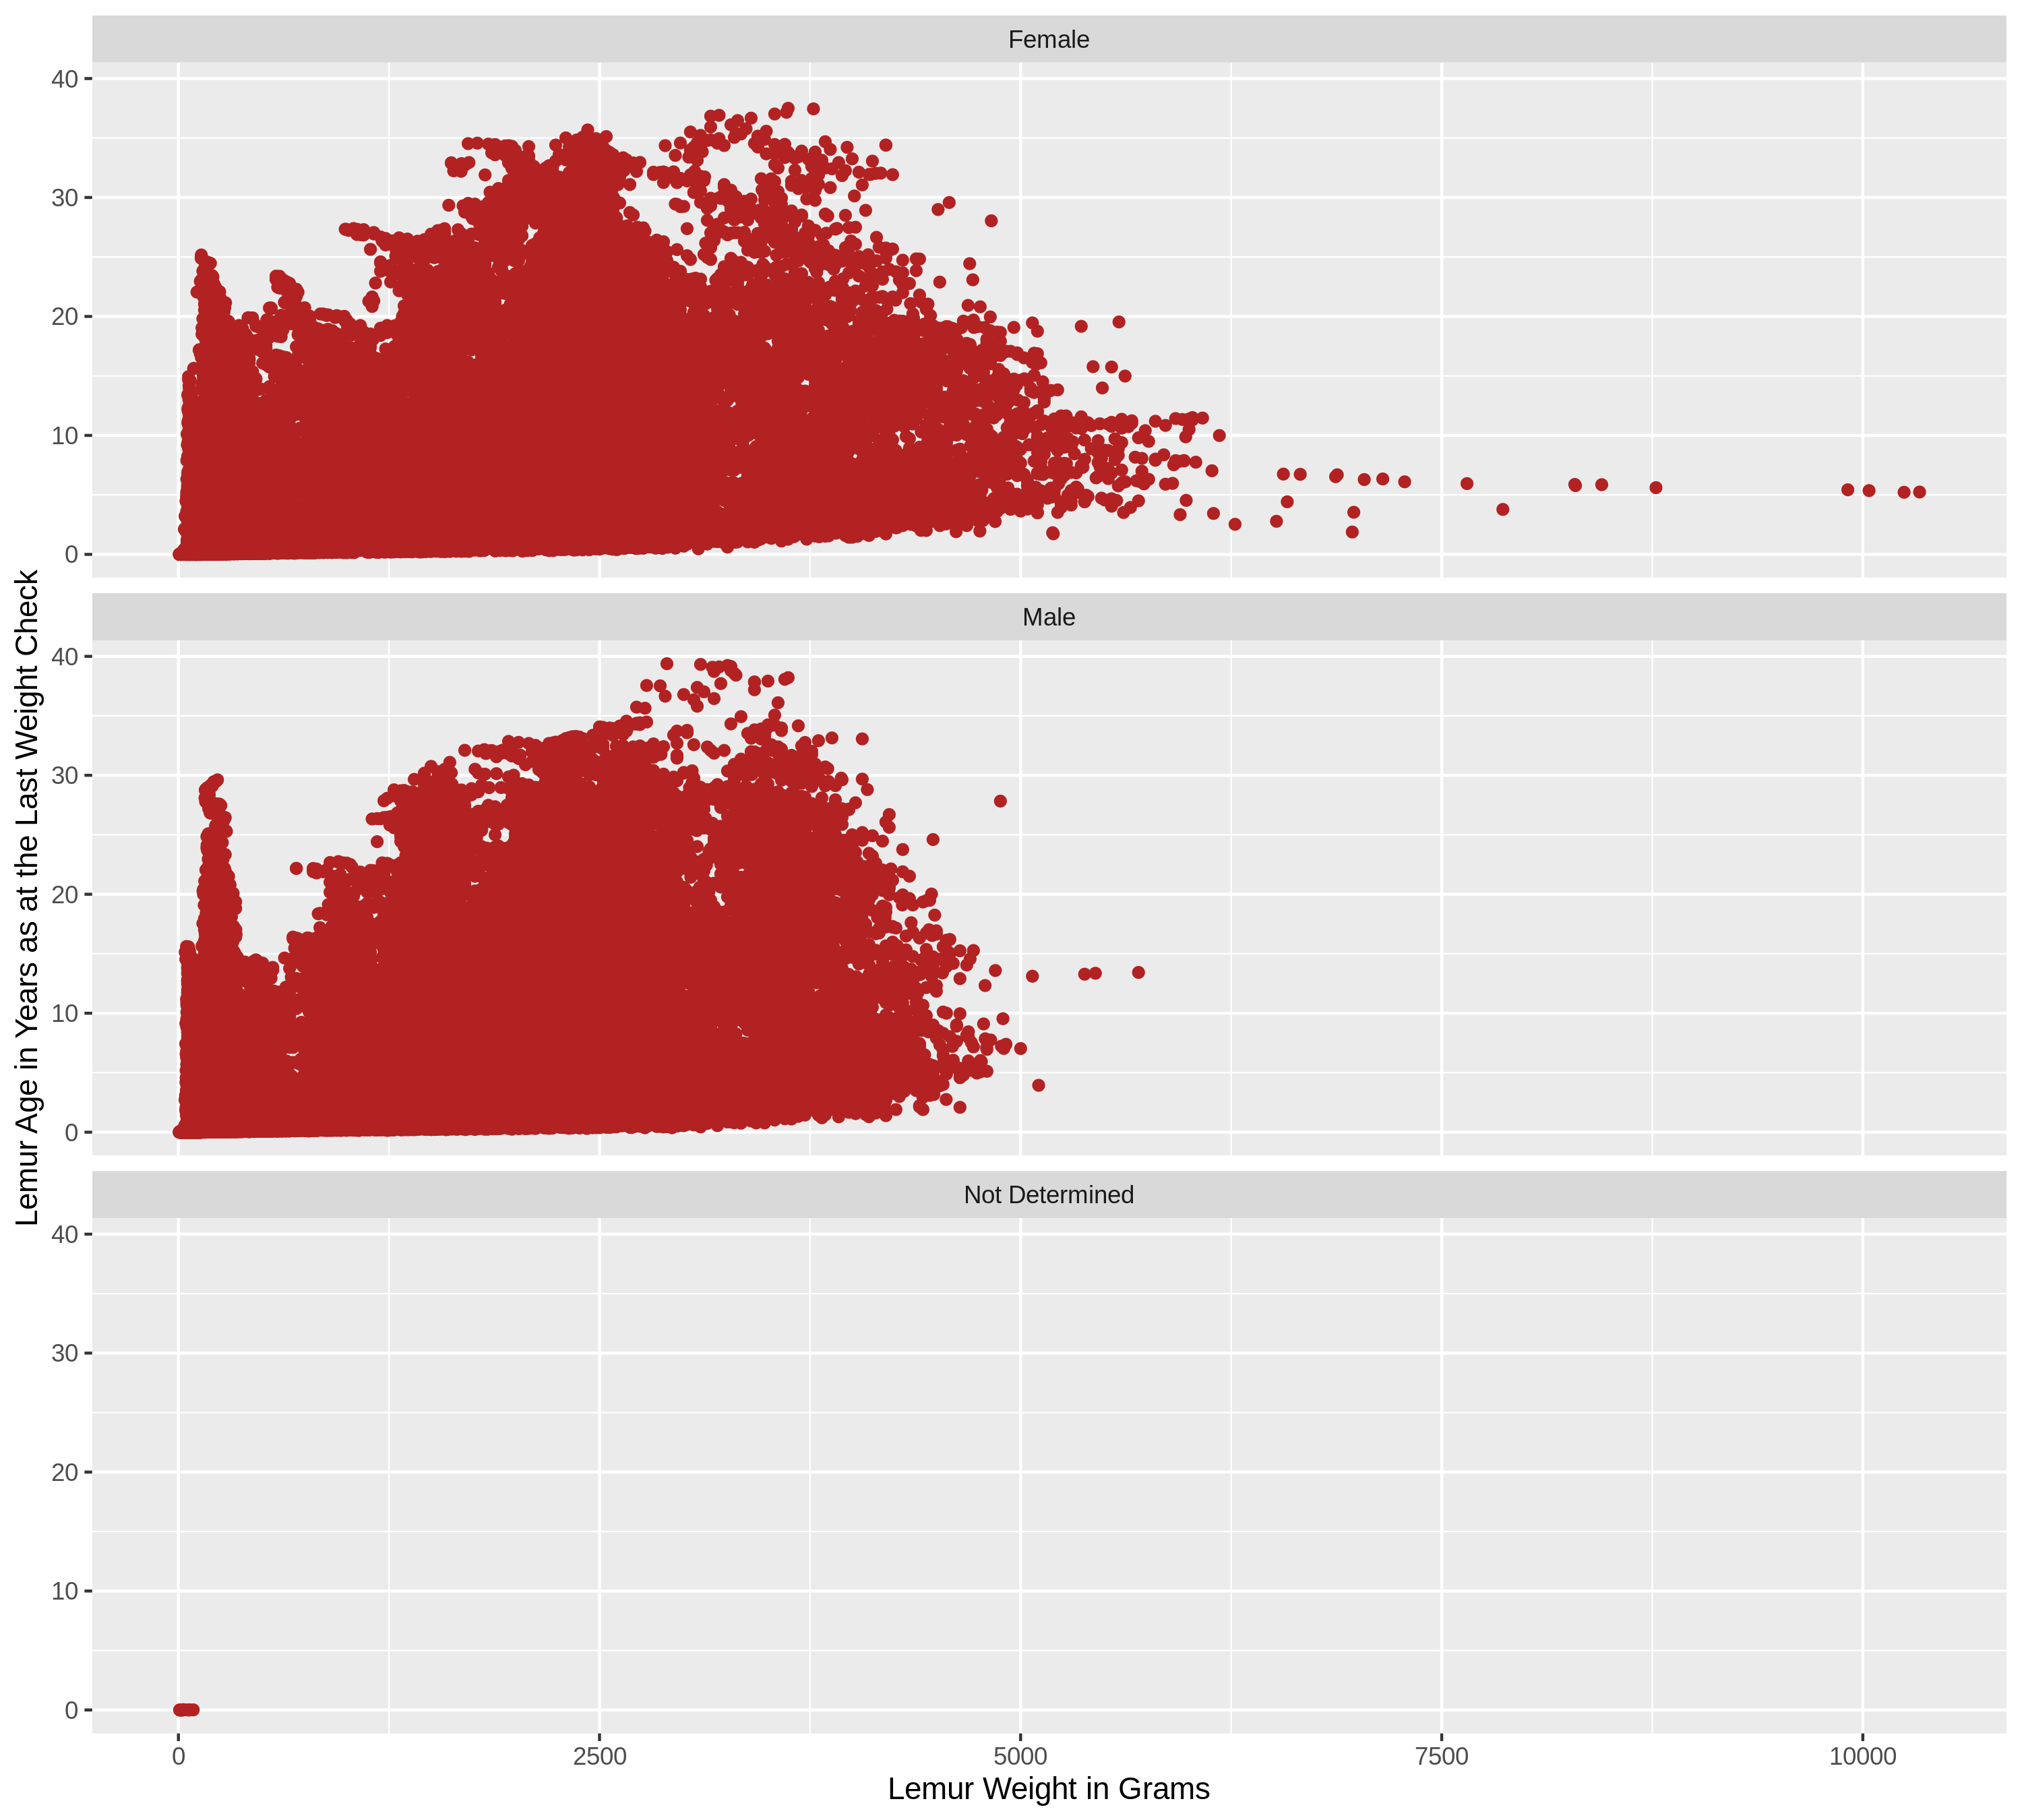

In [3]:
options(repr.plot.width=10, repr.plot.height=9, repr.plot.res = 300)
p = ggplot (lemur, aes (y=age_at_wt_y, x=weight_g)) + 
    geom_point (na.rm=T, color = 'firebrick') +
    facet_wrap (~sex, ncol=1, labeller = as_labeller (c(`F`= 'Female', `M`= 'Male', `ND` = 'Not Determined'))) +
    labs (x='Lemur Weight in Grams', y = 'Lemur Age in Years as at the Last Weight Check')

p

# Histogram

Description 2: The data process of the histogram involves plotting of the 'Age at Death in Years' on the x-axis using 'geom_histogram' and stratified by birth type using the 'facet_wrap' syntax. The 'theme' and the 'labs' functions were used to ensure aesthetic fit and appropriate labelling for the histogram.The histogram below shows frequency of the age at death by birth type of lemur. Although it was expected that the longevity in captive populations should exceed that of the wild populations considering the availability of resources, appropriate diets with no seasonal scarcity, and lack of predation and access to veterinary care in the former (Zehr et al., 2014). However, this chart shows that a higher number of wild born lemurs live longer than captive born lemurs. 

In [4]:
library (scales)


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




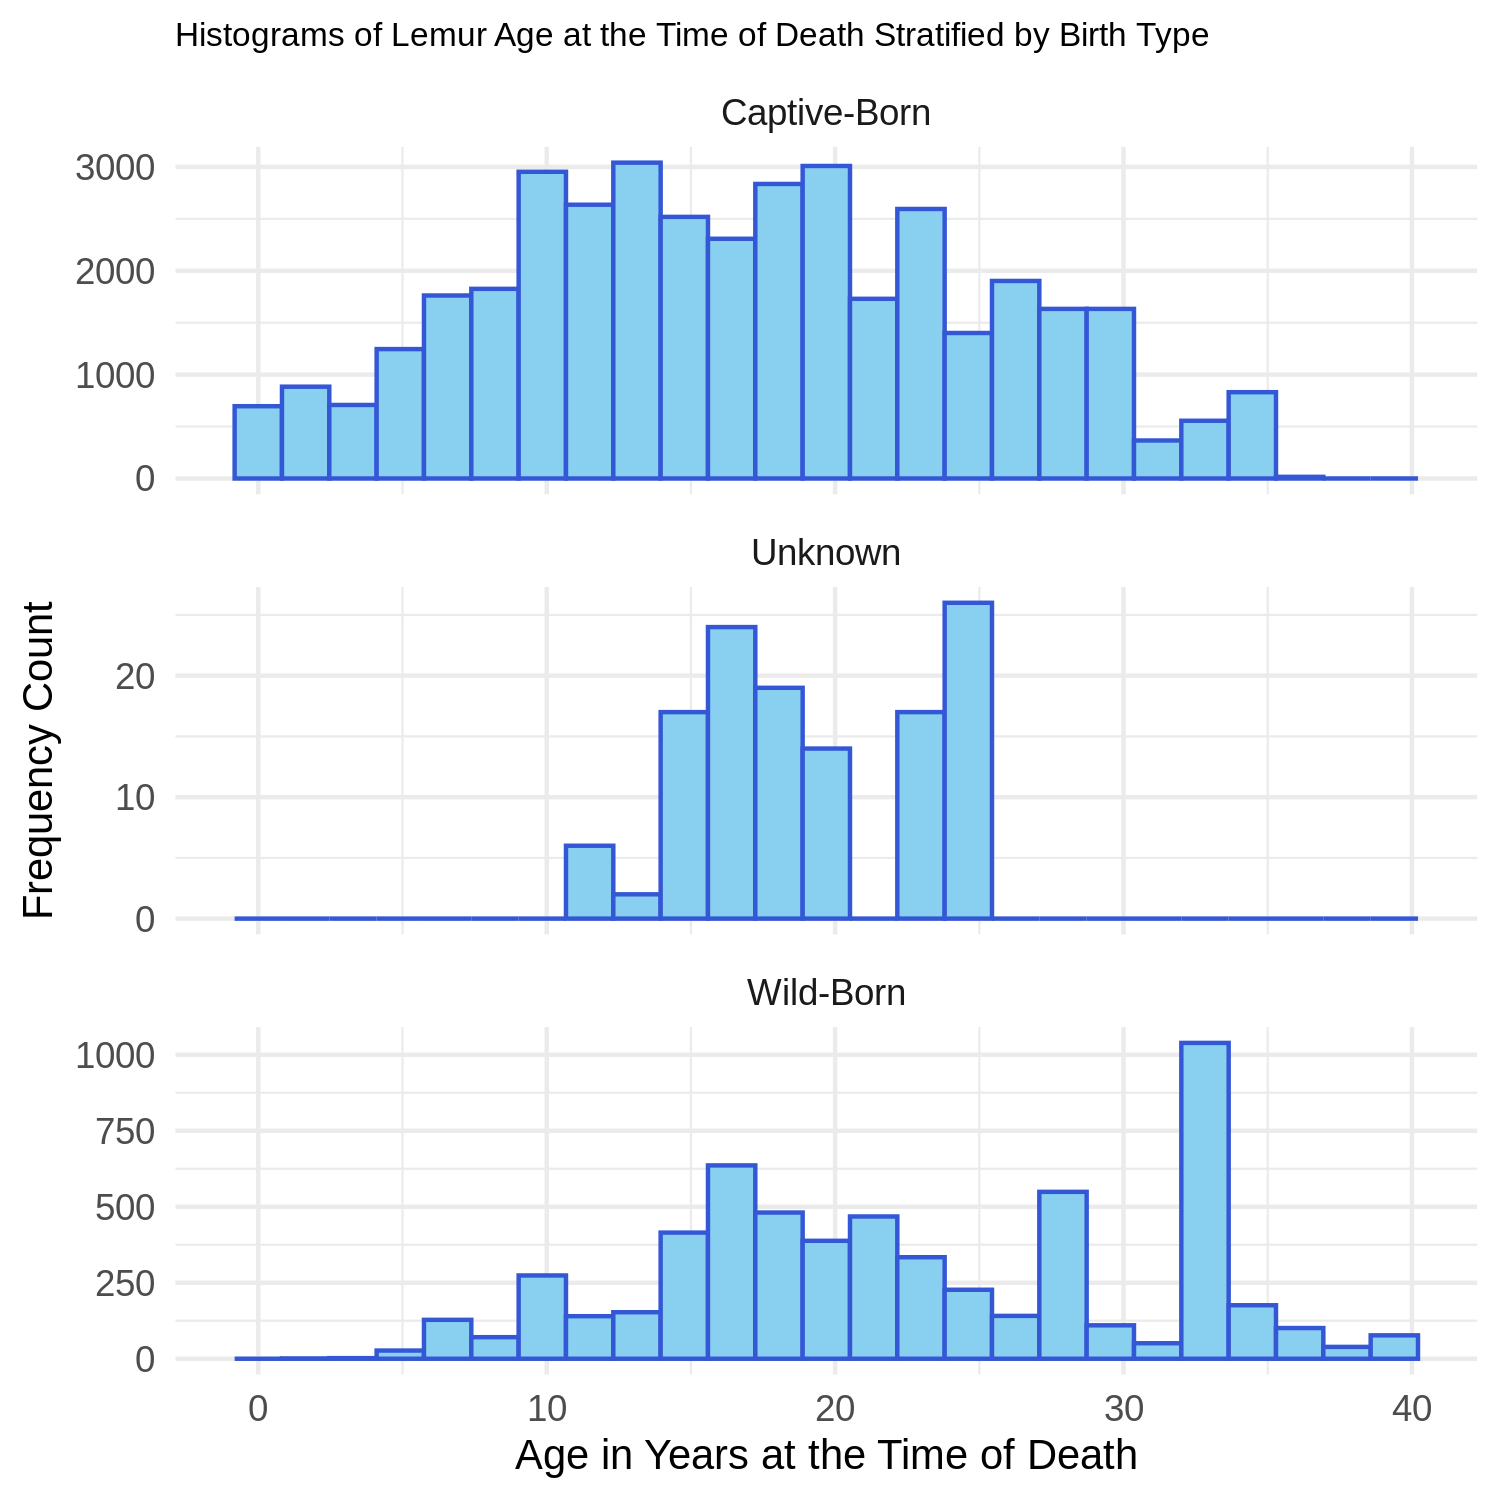

In [5]:
options(repr.plot.width=5, repr.plot.height=5, repr.plot.res = 300)

p = ggplot (lemur, aes (x=age_at_death_y)) + 
    geom_histogram (na.rm=T, bins = 25, color = '#3457D5', fill = '#89CFF0') +
    facet_wrap (~birth_type, ncol=1, scale ='free_y', 
                labeller = as_labeller (c(`CB`= 'Captive-Born', `WB`= 'Wild-Born', `Unk` = 'Unknown'))) +
    scale_x_continuous(labels = comma_format()) +
    theme_minimal() +
    theme(axis.title =  element_text(size = 10), plot.title = element_text (size =8), 
         plot.title.position = 'panel') +
    labs(x= 'Age in Years at the Time of Death', y = 'Frequency Count', 
         title = 'Histograms of Lemur Age at the Time of Death Stratified by Birth Type')
    

p

In [6]:
lemur |>
    group_by (birth_type) |>
    summarize (avg_death_age = mean (age_at_death_y, na.rm=T))
    

birth_type,avg_death_age
<chr>,<dbl>
CB,16.72418
Unk,19.16088
WB,22.54548


# Bar Chart

Description 3: The data process of the bar chart involves plotting the count of each of the 27 species of lemurs at the Duke Lemur Center using the 'geom_bar'. The 'Lemur' dataset does not contain the full latin or common names of each of the 27 species of lemurs, rather it only has the 'taxon' column for taxonomic codes. I created a new csv file using the full latin names and common names of the taxonomic codes found on tidytuesday and then use the 'left_join' function to connect the two dataset. The latin names of the species was plotted on the y-axis using the 'forcats' function to order the bars based on frequency. The 'theme' and 'labs' function were used for chart formatting and axis labelling. 

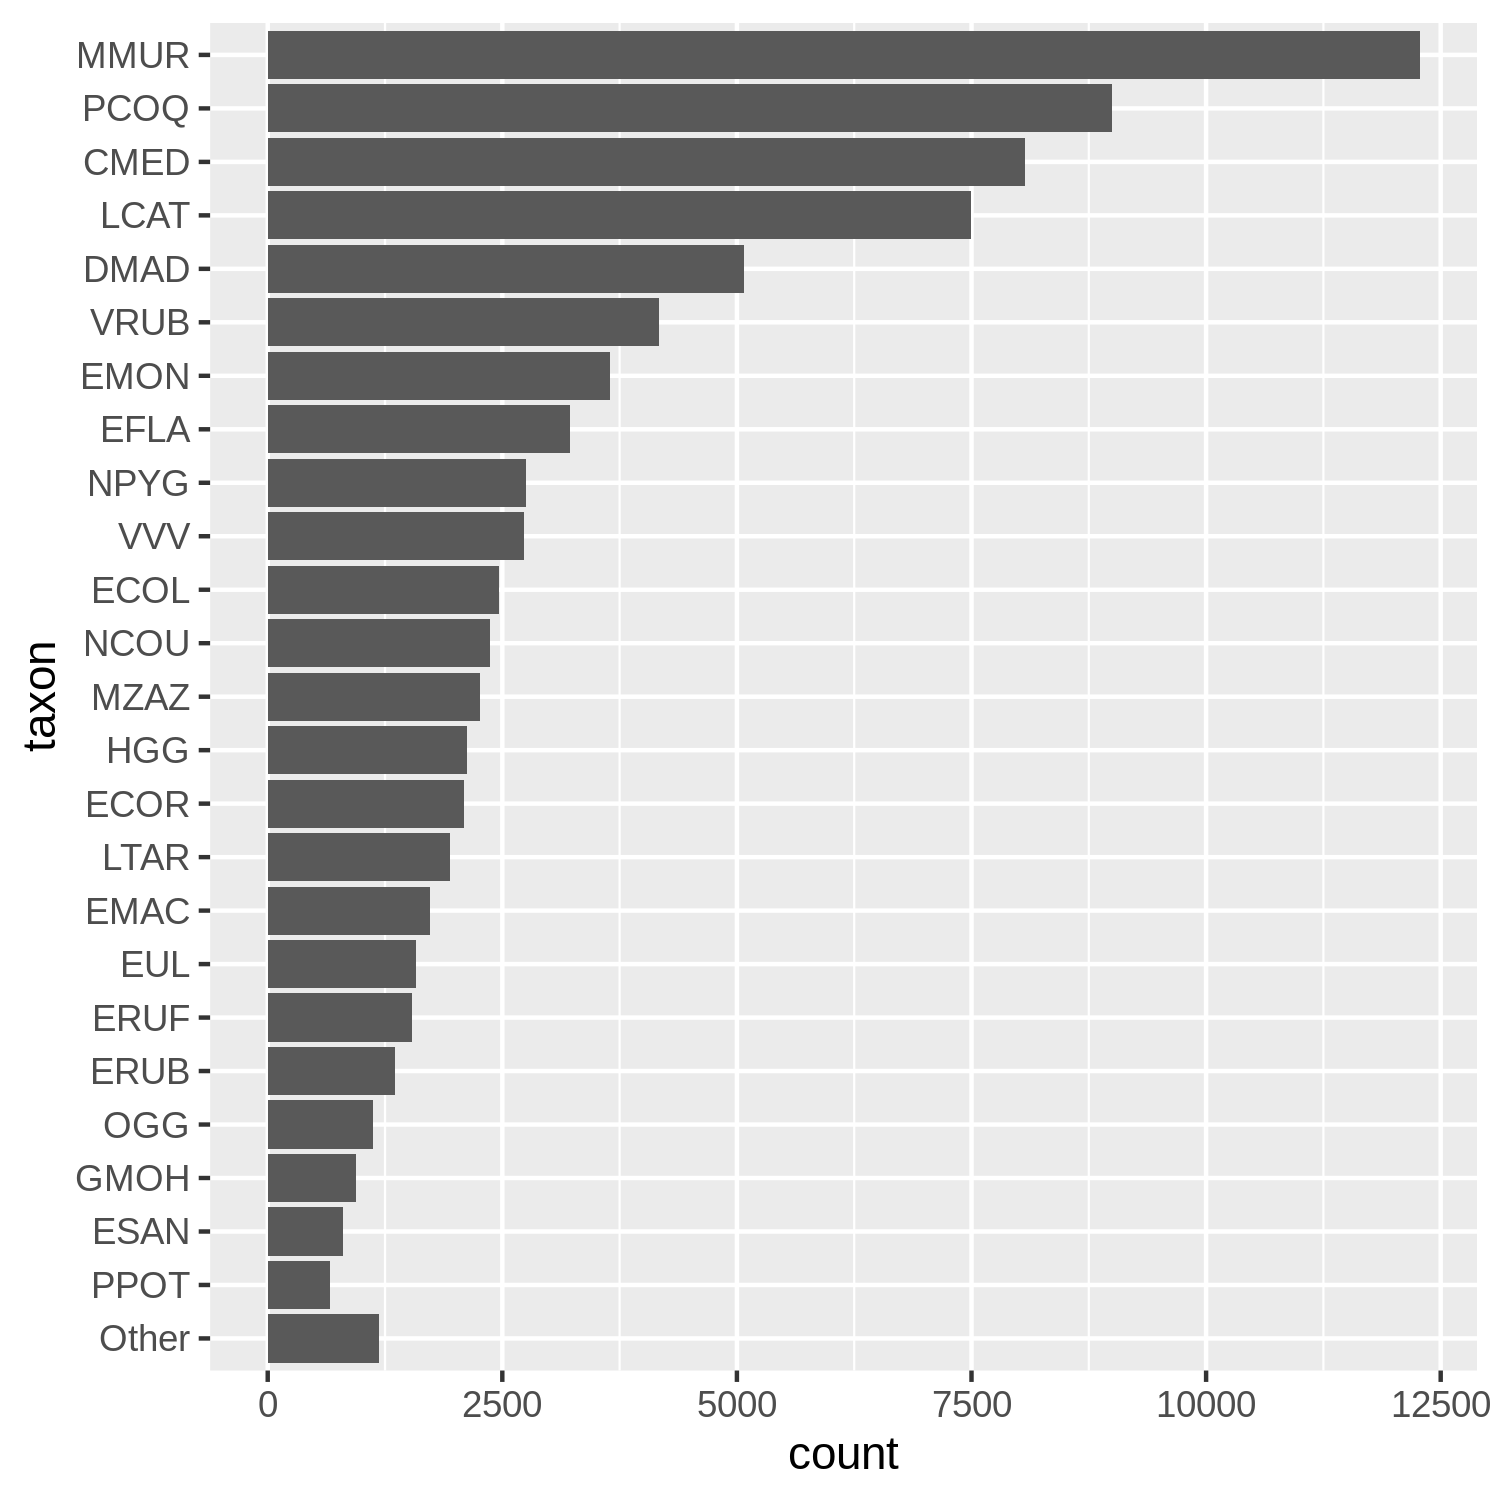

In [7]:
lemur2 = lemur |>
    select (taxon, name, sex) |>
    mutate (taxon = taxon |>
            fct_lump (n=24) |>
            fct_infreq () |> fct_rev () |>
            fct_relevel ("Other") )

p = ggplot (lemur2, aes (y=taxon)) + geom_bar ()

p

In [8]:
Taxon = read_csv('Taxon_name1.csv', col_types = cols())

In [9]:
Taxon |> head ()

taxon,Latin name,Common name
<chr>,<chr>,<chr>
CMED,Cheirogaleus medius,Fat-tailed dwarf lemur
DMAD,Daubentonia madagascariensis,Aye-aye
EALB,Eulemur albifrons,White-fronted brown lemur
ECOL,Eulemur collaris,Collared brown lemur
ECOR,Eulemur coronatus,Crowned lemur
EFLA,Eulemur flavifrons,Blue-eyed black lemur


In [10]:
lemur4 = lemur |>
    left_join (Taxon)

lemur4 |> head ()

Joining, by = "taxon"


taxon,dlc_id,hybrid,sex,name,current_resident,stud_book,dob,birth_month,estimated_dob,⋯,age_category,preg_status,expected_gestation_d,concep_date_if_preg,infant_dob_if_preg,days_before_inf_birth_if_preg,pct_preg_remain_if_preg,infant_lit_sz_if_preg,Latin name,Common name
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<date>,<dbl>,<chr>,⋯,<chr>,<chr>,<dbl>,<date>,<date>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
OGG,0005,N,M,KANGA,N,NA,1961-08-25,8,NA,⋯,adult,NP,NA,NA,NA,NA,NA,NA,Otolemur garnettii garnettii,Northern greater galago
OGG,0005,N,M,KANGA,N,NA,1961-08-25,8,NA,⋯,adult,NP,NA,NA,NA,NA,NA,NA,Otolemur garnettii garnettii,Northern greater galago
OGG,0006,N,F,ROO,N,NA,1961-03-17,3,NA,⋯,adult,NP,NA,NA,NA,NA,NA,NA,Otolemur garnettii garnettii,Northern greater galago
OGG,0006,N,F,ROO,N,NA,1961-03-17,3,NA,⋯,adult,NP,NA,NA,NA,NA,NA,NA,Otolemur garnettii garnettii,Northern greater galago
OGG,0009,N,M,POOH BEAR,N,NA,1963-09-30,9,NA,⋯,adult,NP,NA,NA,NA,NA,NA,NA,Otolemur garnettii garnettii,Northern greater galago
OGG,0009,N,M,POOH BEAR,N,NA,1963-09-30,9,NA,⋯,adult,NP,NA,NA,NA,NA,NA,NA,Otolemur garnettii garnettii,Northern greater galago


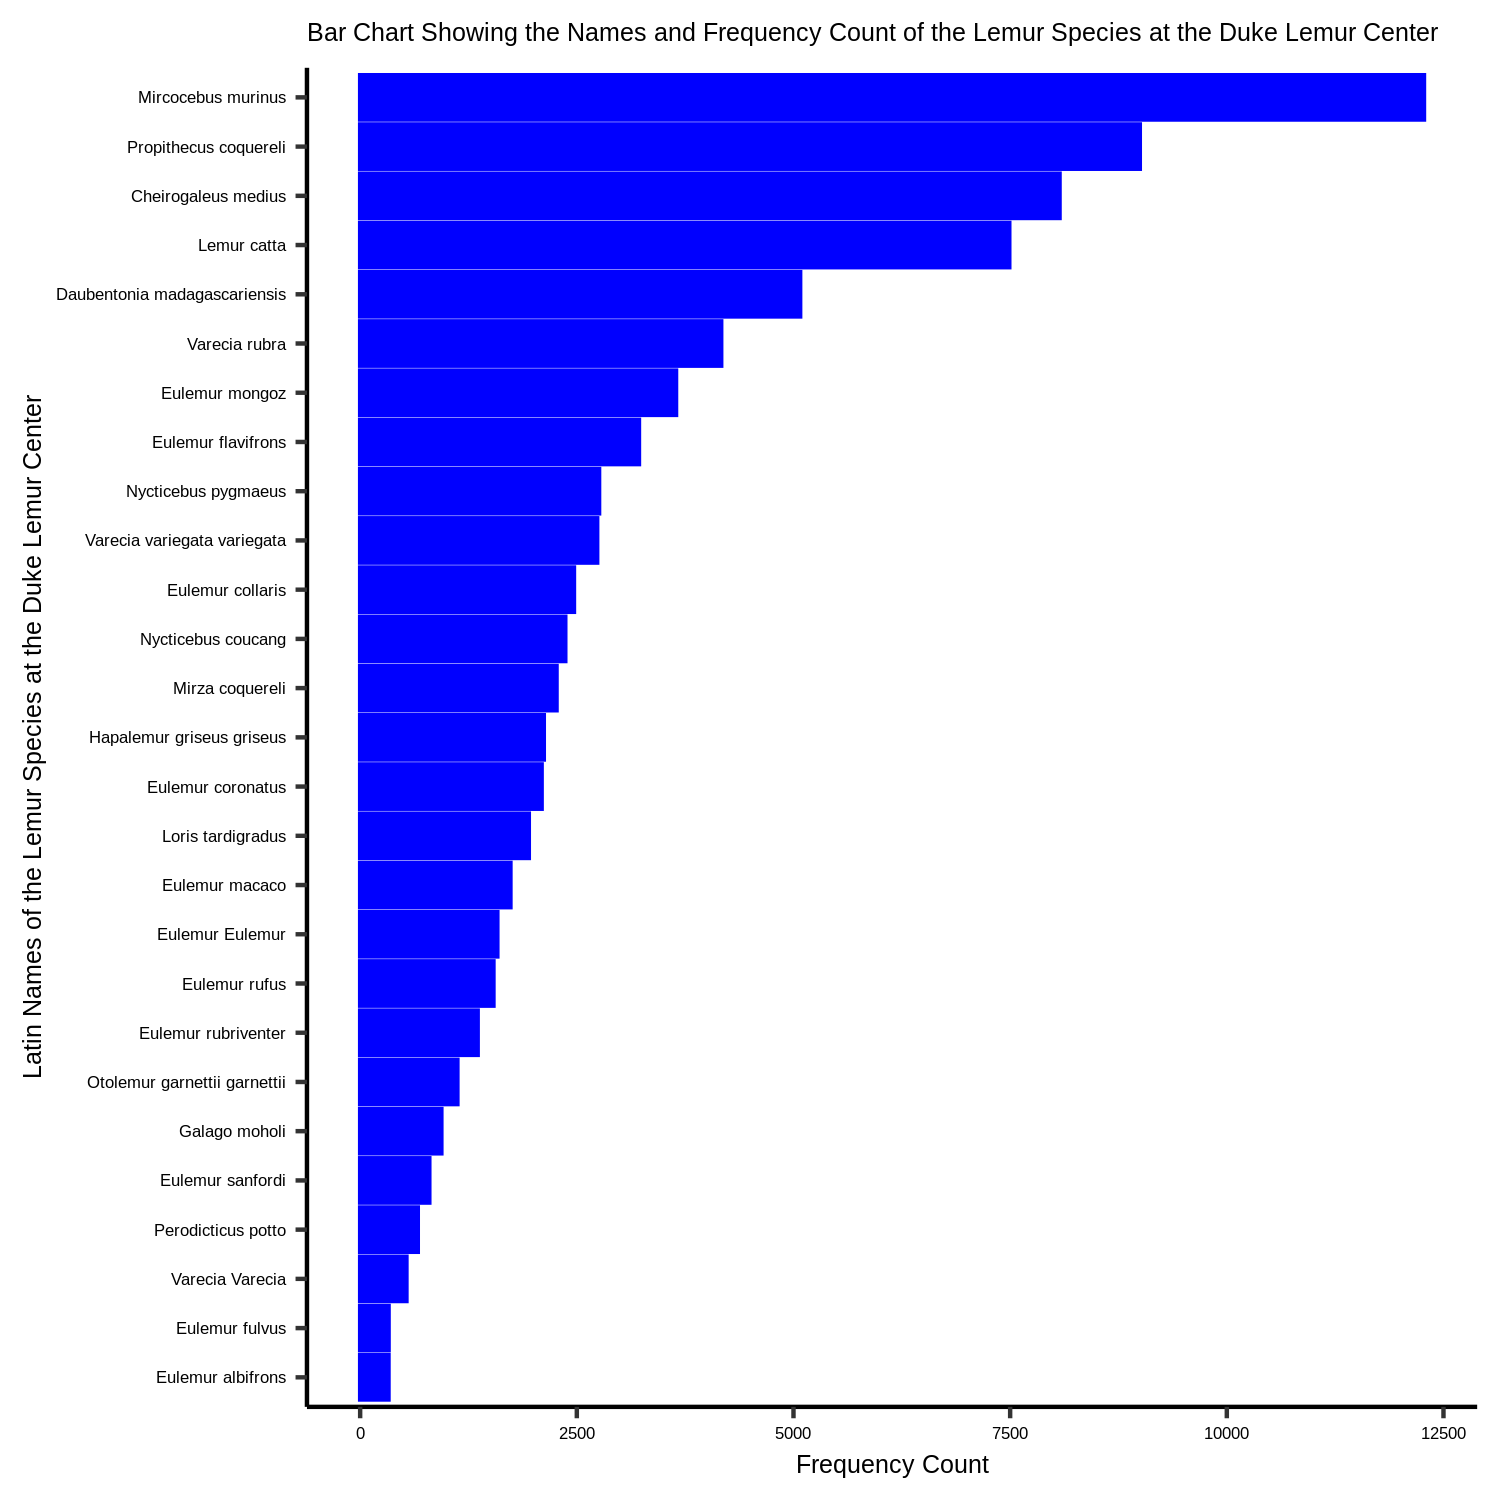

In [11]:
lemur5 = lemur4 |>
    select (taxon, `Latin name`, `Common name`, sex) |>
    mutate (`Latin name` = `Latin name` |>
            fct_infreq () |> fct_rev ()) 
           

p = ggplot (lemur5, aes (y=`Latin name`)) + 
    geom_bar (color = 'blue', fill = 'blue') +
    theme_classic() +
    theme(axis.title =  element_text(size = 6), plot.title = element_text (size =6), 
         plot.title.position = 'panel',
         axis.text = element_text(color = 'black', size = 4)) +
    labs (x='Frequency Count', y= 'Latin Names of the Lemur Species at the Duke Lemur Center', 
          title ='Bar Chart Showing the Names and Frequency Count of the Lemur Species at the Duke Lemur Center'
            )

p